In [1]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import keras

In [2]:
from mnist import MNIST
mndata = MNIST('/home/basit/Documents/samples')
X_train, y_train = mndata.load_training()
X_test, y_test= mndata.load_testing()
X_train=np.array(X_train).astype(np.float)
X_test=np.array(X_test).astype(np.float)
y_train=np.array(y_train).astype(np.float)
y_test=np.array(y_test).astype(np.float)

In [3]:
#reshaping the data

X_train= X_train.reshape(-1,28,28,1)
X_test= X_test.reshape(-1,28,28,1)
y_train= y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)

In [4]:
from keras import layers, models

dropout_rate=0.2

model= models.Sequential()

model.add(layers.Conv2D(128,(3,3) , activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
#model.add(layers.Dropout(dropout_rate))
model.add(layers.Conv2D(16,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Flatten())
model.add(layers.Dense(150, activation='relu'))
#model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(10,activation='softmax'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 16)          4

In [6]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(),metrics='accuracy')

In [7]:
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 1.4051 - accuracy: 0.5157 - val_loss: 0.1196 - val_accuracy: 0.9669
Epoch 2/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2304 - accuracy: 0.9285 - val_loss: 0.0755 - val_accuracy: 0.9795
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1497 - accuracy: 0.9533 - val_loss: 0.0645 - val_accuracy: 0.9818
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1164 - accuracy: 0.9657 - val_loss: 0.0582 - val_accuracy: 0.9837
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1062 - accuracy: 0.9691 - val_loss: 0.0608 - val_accuracy: 0.9844
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0879 - accuracy: 0.9734 - val_loss: 0.0539 - val_accuracy: 0.9868
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0877 - accuracy: 0.9734 - val_loss: 0.0483 - val_ac

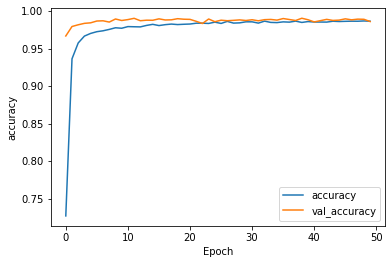

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'],loc='lower right')